In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import scipy as scipy

# Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
col_names = ["classification",
             "age" ,
             "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]
feature_names = [ "age" ,
              "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]

In [3]:
ds = pd.read_csv("../Datasets/breast-cancer.data", header=None, names=col_names)

In [4]:
ds.head()

,classification,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
ds["deg-malig"] = ds["deg-malig"].astype('category')

In [6]:
set(ds["menopause"].values)

{'ge40', 'lt40', 'premeno'}

In [7]:
one_hot_feature_names = pd.get_dummies(ds[feature_names]).columns.values
one_hot_feature_names

array(['age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_0-4', 'tumor-size_10-14',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54',
       'inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_?', 'node-caps_no', 'node-caps_yes',
       'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left',
       'breast_right', 'breast-quad_?', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_no',
       'irradiat_yes'], dtype=object)

In [8]:
enc = preprocessing.OneHotEncoder()
enc.fit(ds[feature_names])
FEATURES = enc.transform(ds[feature_names]).toarray()

In [9]:
FEATURES

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
le = preprocessing.LabelEncoder().fit(ds["classification"])

In [11]:
LABELS = le.transform(ds["classification"])

In [12]:
LABELS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
def print_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = one_hot_feature_names, class_names=["no-recurrence-events", "RECURRENCE-EVENTS"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('dt.png')
    Image(graph.create_png())

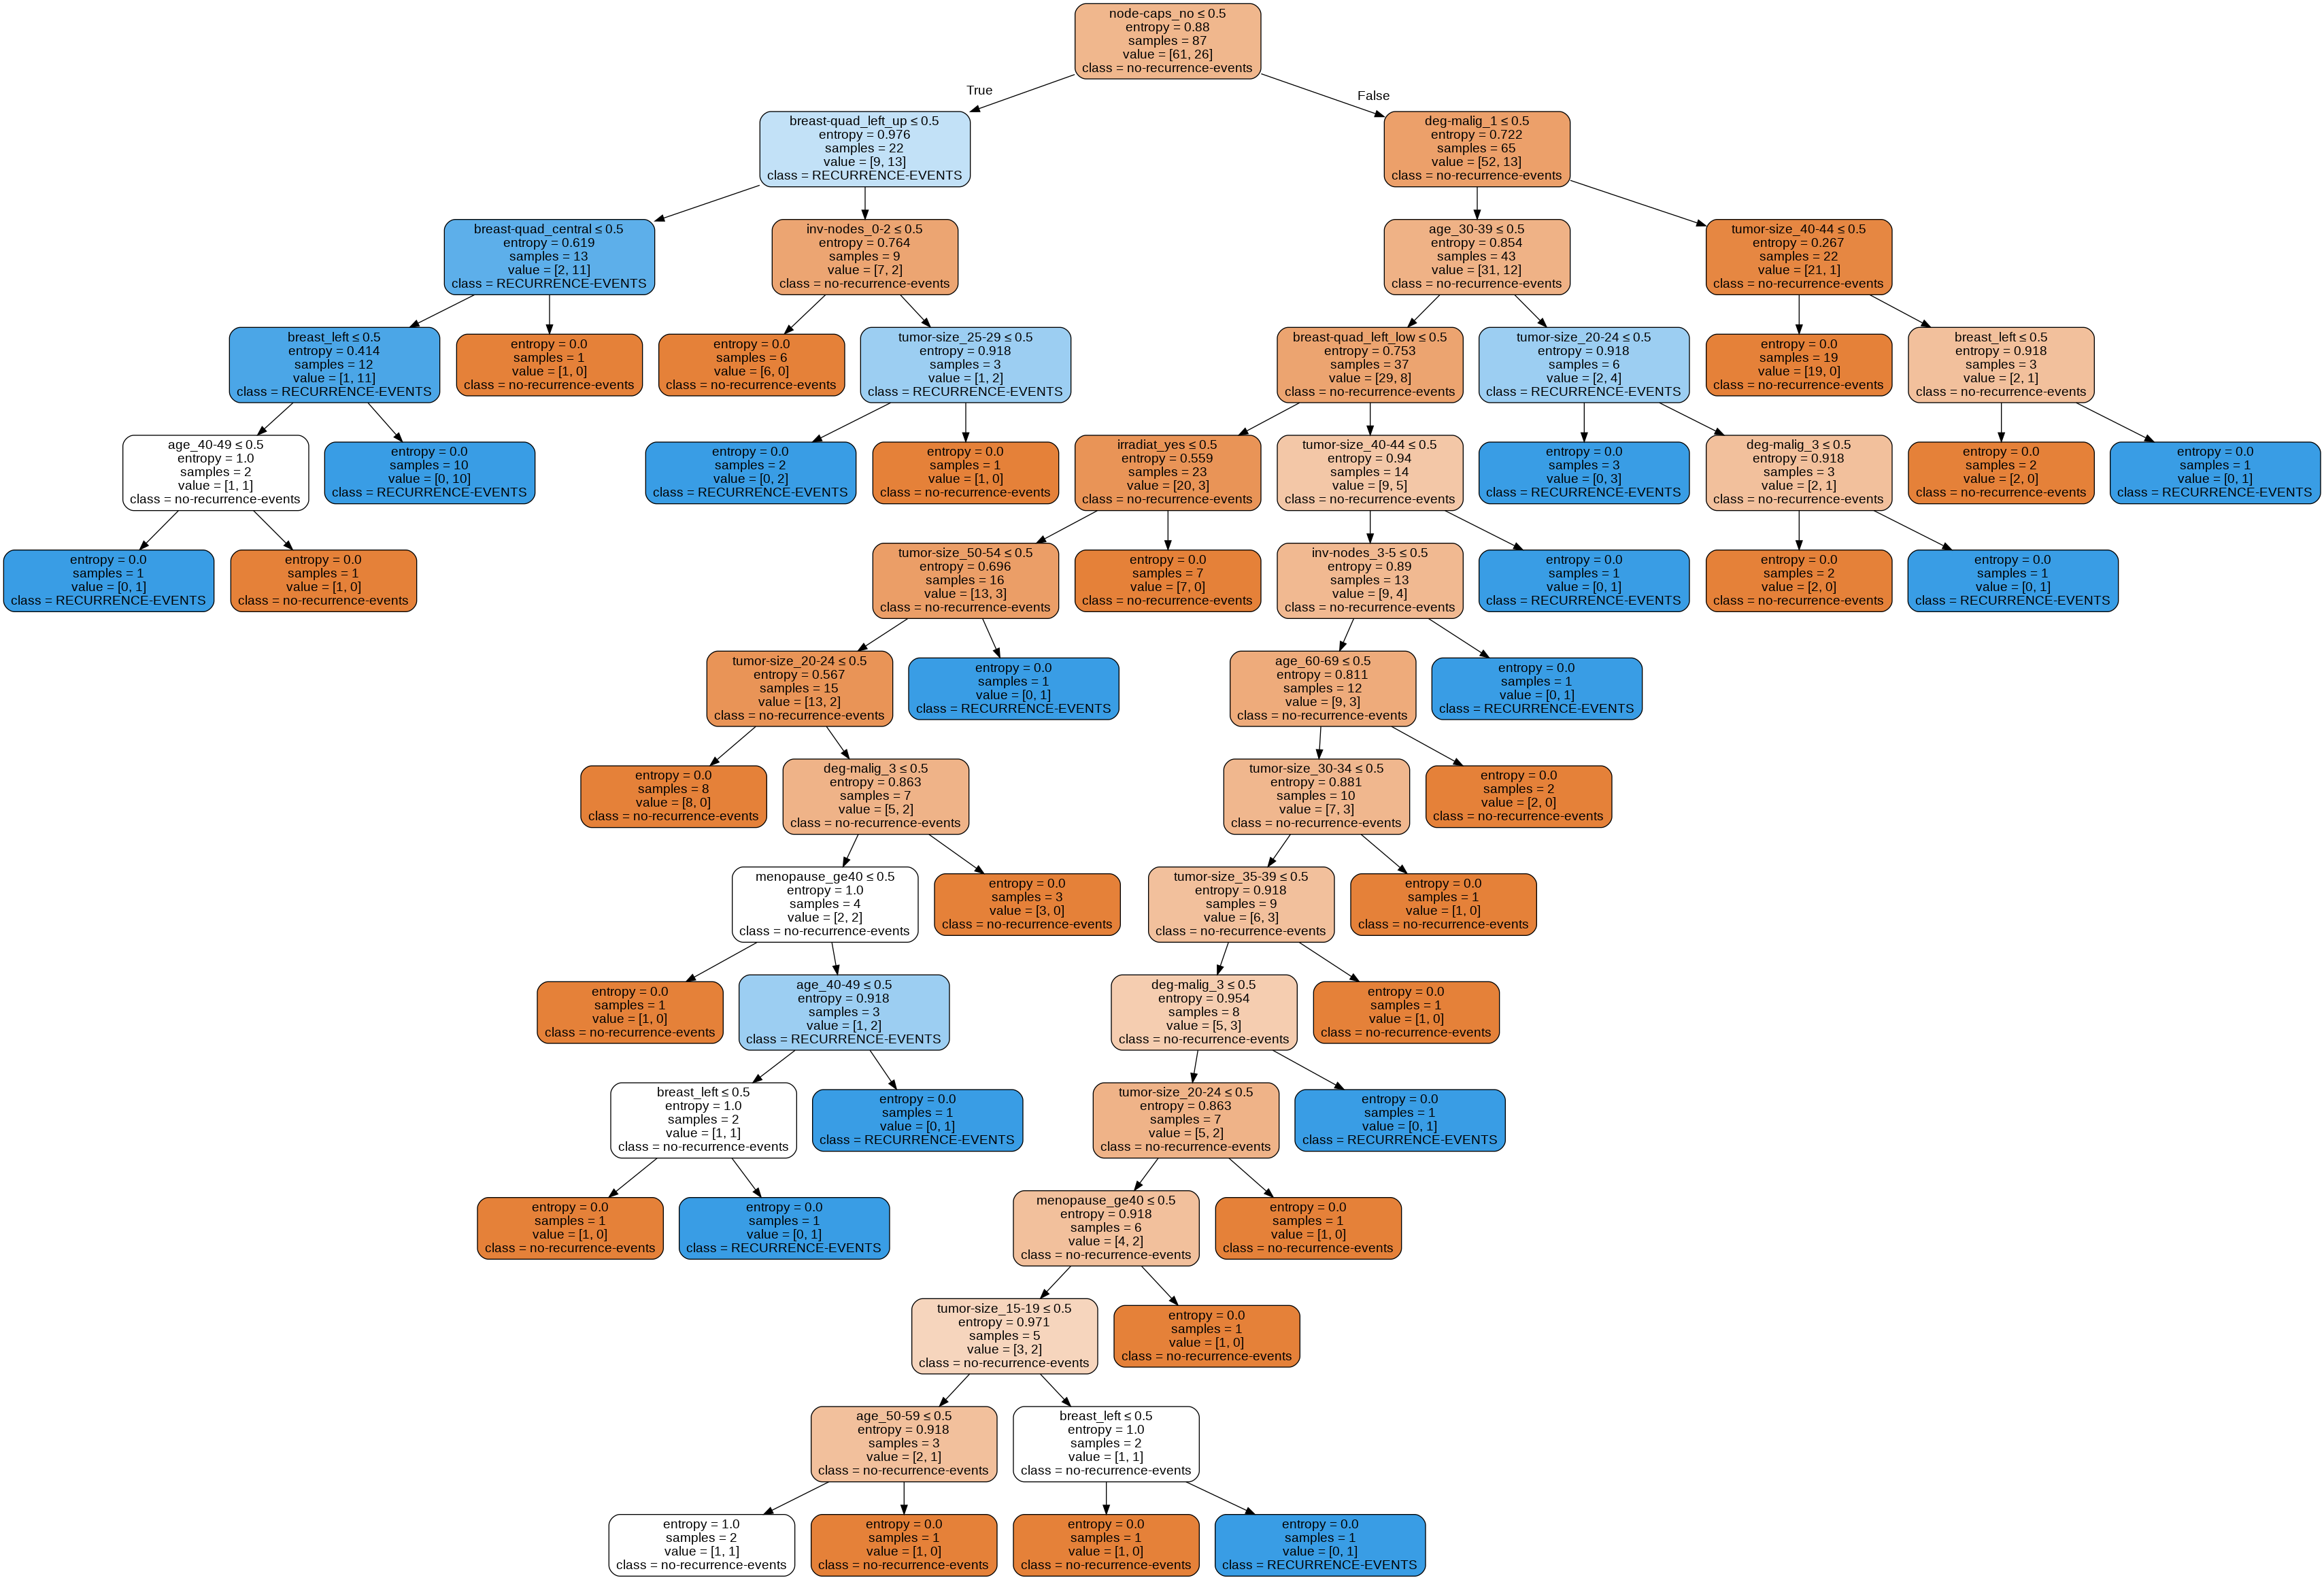

In [43]:
import collections
import random

total_samples = len(LABELS)
pruning_ratio = 0.7

frequencies =  collections.Counter(LABELS)
prune_indexes_for_class = {k: random.sample(range(0,v), int(v*pruning_ratio)) for k, v in frequencies.items()}
frequencies_counter = {k: 0 for k, v in frequencies.items()}
training = np.array([])
pruning = np.array([])
for i in range(0, total_samples):
    if frequencies_counter[LABELS[i]] in prune_indexes_for_class[LABELS[i]]:
        pruning = np.append(pruning, np.array([i]))
    else:
        training = np.append(training, np.array([i]))
    frequencies_counter[LABELS[i]] += 1
dt = DecisionTreeClassifier(criterion="entropy")
dt = dt.fit(FEATURES[[int(v) for v in training]], LABELS[[int(v) for v in training]])  

print_tree(dt)
Image("dt.png")

In [44]:
frequencies

Counter({0: 201, 1: 85})

In [45]:
random.sample(range(0,85), int(85*0.2))

[22, 58, 54, 50, 46, 78, 64, 39, 2, 35, 23, 75, 17, 9, 4, 72, 20]

In [46]:
misses = [ LABELS[int(v)] != dt.predict(FEATURES[int(v)].reshape(1,-1))[0]  for v in pruning ]
hits = [ LABELS[int(v)] == dt.predict(FEATURES[int(v)].reshape(1,-1))[0]  for v in pruning ]

In [47]:
pruning

array([  0.,   1.,   2.,   4.,   8.,   9.,  10.,  11.,  14.,  16.,  19.,
        20.,  21.,  22.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,
        33.,  34.,  35.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  47.,  48.,  50.,  54.,  58.,  60.,  61.,  62.,  63.,  64.,
        65.,  67.,  69.,  71.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  90.,  92.,  93.,  95.,
        96.,  97.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 113., 114., 117., 118., 119., 120., 122.,
       123., 124., 125., 126., 129., 130., 133., 134., 136., 137., 138.,
       139., 140., 141., 142., 143., 145., 147., 148., 149., 150., 151.,
       152., 154., 155., 159., 162., 164., 165., 166., 168., 170., 172.,
       173., 174., 175., 177., 179., 180., 181., 184., 189., 191., 192.,
       193., 194., 195., 196., 197., 198., 199., 200., 203., 204., 205.,
       206., 207., 208., 209., 210., 211., 212., 21

In [48]:
pruning[misses]

array([  0.,  16.,  20.,  22.,  28.,  32.,  35.,  50.,  72.,  74.,  90.,
        99., 100., 107., 126., 136., 138., 140., 141., 145., 147., 148.,
       151., 154., 164., 166., 172., 174., 179., 180., 184., 189., 192.,
       193., 194., 203., 204., 206., 207., 208., 209., 210., 211., 212.,
       213., 217., 218., 219., 220., 221., 222., 223., 227., 229., 230.,
       231., 234., 236., 239., 244., 250., 251., 254., 255., 256., 259.,
       260., 262., 269., 274., 275., 277., 283.])

In [49]:
pruning[hits]

array([  1.,   2.,   4.,   8.,   9.,  10.,  11.,  14.,  19.,  21.,  24.,
        25.,  26.,  27.,  29.,  30.,  33.,  34.,  37.,  38.,  39.,  40.,
        41.,  42.,  43.,  44.,  45.,  47.,  48.,  54.,  58.,  60.,  61.,
        62.,  63.,  64.,  65.,  67.,  69.,  71.,  73.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  92.,  93.,  95.,
        96.,  97., 101., 102., 103., 104., 105., 106., 108., 109., 110.,
       111., 113., 114., 117., 118., 119., 120., 122., 123., 124., 125.,
       129., 130., 133., 134., 137., 139., 142., 143., 149., 150., 152.,
       155., 159., 162., 165., 168., 170., 173., 175., 177., 181., 191.,
       195., 196., 197., 198., 199., 200., 205., 224., 228., 235., 240.,
       241., 245., 247., 252., 258., 264., 265., 266., 268., 271., 273.,
       276., 278., 280., 284., 285.])

In [80]:
hit_paths =  dt.decision_path(FEATURES[[int(v) for v in pruning[hits]]])

In [81]:
miss_paths =  dt.decision_path(FEATURES[[int(v) for v in pruning[misses]]])

In [82]:
print(hit_paths[0])

  (0, 0)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1


In [83]:
n_nodes = dt.tree_.node_count

In [84]:
dt.tree_.children_left

array([ 1,  2, -1,  4,  5, -1, -1, -1, -1, -1, -1, 12, -1, -1, 15, 16, 17,
       -1, 19, 20, -1, 22, 23, -1, 25, -1, -1, -1, -1, -1, -1, -1, 33, -1,
       35, 36, 37, 38, 39, 40, 41, 42, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 63, -1, -1])

In [85]:
dt.tree_.children_right

array([14,  9, -1,  7,  6, -1, -1, -1, -1, -1, -1, 13, -1, -1, 60, 55, 32,
       -1, 30, 21, -1, 29, 24, -1, 28, -1, -1, -1, -1, -1, -1, -1, 54, -1,
       52, 51, 50, 49, 48, 47, 44, 43, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 64, -1, -1])

In [86]:
from sklearn.tree._tree import TREE_LEAF
hit_miss_counts = [ {'value': dt.tree_.value[i],
                     'static_hits': 0,
                     'static_misses': 0,
                     'hits': 0, 
                     'misses': 0, 
                     'total': 0, 
                     'error': 0,
                     'leaf':  (dt.tree_.children_left[i] == TREE_LEAF) & 
                              (dt.tree_.children_right[i] == TREE_LEAF)} 
                   for i in range(0,n_nodes)   ]

In [87]:
cx = scipy.sparse.coo_matrix(hit_paths)
for i,j,v in zip(cx.row, cx.col, cx.data):
    hit_miss_counts[j]['hits'] += 1
    hit_miss_counts[j]['total'] += 1
    
cx = scipy.sparse.coo_matrix(miss_paths)
for i,j,v in zip(cx.row, cx.col, cx.data):
    hit_miss_counts[j]['misses'] += 1
    hit_miss_counts[j]['total'] += 1

In [88]:
hit_miss_counts

[{'value': array([[61., 26.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 126,
  'misses': 73,
  'total': 199,
  'error': 0,
  'leaf': False},
 {'value': array([[ 9., 13.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 20,
  'misses': 22,
  'total': 42,
  'error': 0,
  'leaf': False},
 {'value': array([[ 2., 11.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 16,
  'misses': 14,
  'total': 30,
  'error': 0,
  'leaf': True},
 {'value': array([[ 1., 11.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 0,
  'misses': 0,
  'total': 0,
  'error': 0,
  'leaf': False},
 {'value': array([[1., 1.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 0,
  'misses': 0,
  'total': 0,
  'error': 0,
  'leaf': False},
 {'value': array([[0., 1.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 0,
  'misses': 0,
  'total': 0,
  'error': 0,
  'leaf': True},
 {'value': array([[1., 0.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 0,
  'misses': 0,
  'tota

In [89]:
prune_candidates = np.array([])
for i in range(0,len(hit_miss_counts)):
    item = hit_miss_counts[i]
    if item['value'][0][0] < item['value'][0][1]:
        item['label'] = 1
    else:        
        item['label'] = 0 
    if item['total'] > 0:
        item['error'] = item['misses']/item['total']
        if  (not item['leaf']) and  hit_miss_counts[dt.tree_.children_left[i]]['leaf']   and  hit_miss_counts[dt.tree_.children_right[i]]['leaf']:
            prune_candidates = np.append(prune_candidates, np.array([i]))
            
for idx in pruning:
    index = int(idx)
    cx = scipy.sparse.coo_matrix(dt.decision_path([FEATURES[index]]))
    for i,j,v in zip(cx.row, cx.col, cx.data):
        if LABELS[index] == hit_miss_counts[j]['label']:
            hit_miss_counts[j]['static_hits'] += 1 
        else:
            hit_miss_counts[j]['static_misses'] += 1 
            
for i in range(0,len(hit_miss_counts)):
    hit_miss_counts[i]['static_error'] = 0
    if hit_miss_counts[i]['total'] > 0: 
        hit_miss_counts[i]['static_error'] = hit_miss_counts[i]['static_misses']/ hit_miss_counts[i]['total']

In [90]:
hit_miss_counts

[{'value': array([[61., 26.]]),
  'static_hits': 140,
  'static_misses': 59,
  'hits': 126,
  'misses': 73,
  'total': 199,
  'error': 0.36683417085427134,
  'leaf': False,
  'label': 0,
  'static_error': 0.2964824120603015},
 {'value': array([[ 9., 13.]]),
  'static_hits': 21,
  'static_misses': 21,
  'hits': 20,
  'misses': 22,
  'total': 42,
  'error': 0.5238095238095238,
  'leaf': False,
  'label': 1,
  'static_error': 0.5},
 {'value': array([[ 2., 11.]]),
  'static_hits': 16,
  'static_misses': 14,
  'hits': 16,
  'misses': 14,
  'total': 30,
  'error': 0.4666666666666667,
  'leaf': True,
  'label': 1,
  'static_error': 0.4666666666666667},
 {'value': array([[ 1., 11.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 0,
  'misses': 0,
  'total': 0,
  'error': 0,
  'leaf': False,
  'label': 1,
  'static_error': 0},
 {'value': array([[1., 1.]]),
  'static_hits': 0,
  'static_misses': 0,
  'hits': 0,
  'misses': 0,
  'total': 0,
  'error': 0,
  'leaf': False,
  'label': 0,
  's

In [91]:
prune_candidates

array([ 1., 32.])

In [92]:
for v in prune_candidates:
    node = hit_miss_counts[int(v)] 
    static_error = node['static_error']
    error = node['error']
    if static_error < error:
        print(int(v))
        dt.tree_.children_left[int(v)] = TREE_LEAF
        dt.tree_.children_right[int(v)] = TREE_LEAF

1
32


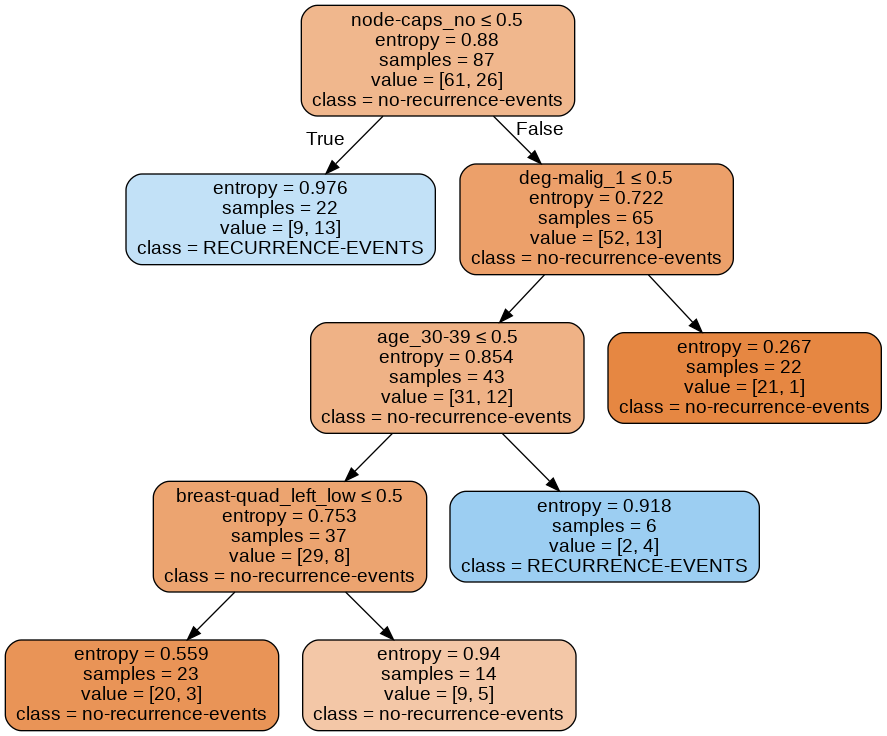

In [93]:

print_tree(dt)
Image("dt.png")

In [33]:
n_nodes = dt.tree_.node_count
children_left = dt.tree_.children_left
children_right = dt.tree_.children_right
feature = dt.tree_.feature
threshold = dt.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%sn=%s leaf" % (node_depth[i] * "\t", i))
    else:
        print("%sn=%s test  node %s if X[:, %s] <= %s else  "
              "n %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 one_hot_feature_names[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 53 nodes and has the following tree structure:
n=0 test  node 1 if X[:, node-caps_no] <= 0.5 else  n 16.
	n=1 test  node 2 if X[:, tumor-size_20-24] <= 0.5 else  n 15.
		n=2 test  node 3 if X[:, deg-malig_2] <= 0.5 else  n 12.
			n=3 test  node 4 if X[:, node-caps_yes] <= 0.5 else  n 5.
				n=4 leaf
				n=5 test  node 6 if X[:, tumor-size_25-29] <= 0.5 else  n 11.
					n=6 test  node 7 if X[:, inv-nodes_0-2] <= 0.5 else  n 8.
						n=7 leaf
						n=8 test  node 9 if X[:, breast-quad_right_up] <= 0.5 else  n 10.
							n=9 leaf
							n=10 leaf
					n=11 leaf
			n=12 test  node 13 if X[:, age_60-69] <= 0.5 else  n 14.
				n=13 leaf
				n=14 leaf
		n=15 leaf
	n=16 test  node 17 if X[:, menopause_premeno] <= 0.5 else  n 24.
		n=17 test  node 18 if X[:, inv-nodes_3-5] <= 0.5 else  n 23.
			n=18 test  node 19 if X[:, breast-quad_central] <= 0.5 else  n 20.
				n=19 leaf
				n=20 test  node 21 if X[:, age_50-59] <= 0.5 else  n 22.
					n=21 leaf
					n=22 leaf
	

In [96]:
def post_prune(dt, pruning_ratio):
    total_samples = len(LABELS)  
    #TODO


In [77]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(dt.tree_.children_left < 0))


36


In [78]:
prune_index(dt.tree_, 0, 5)

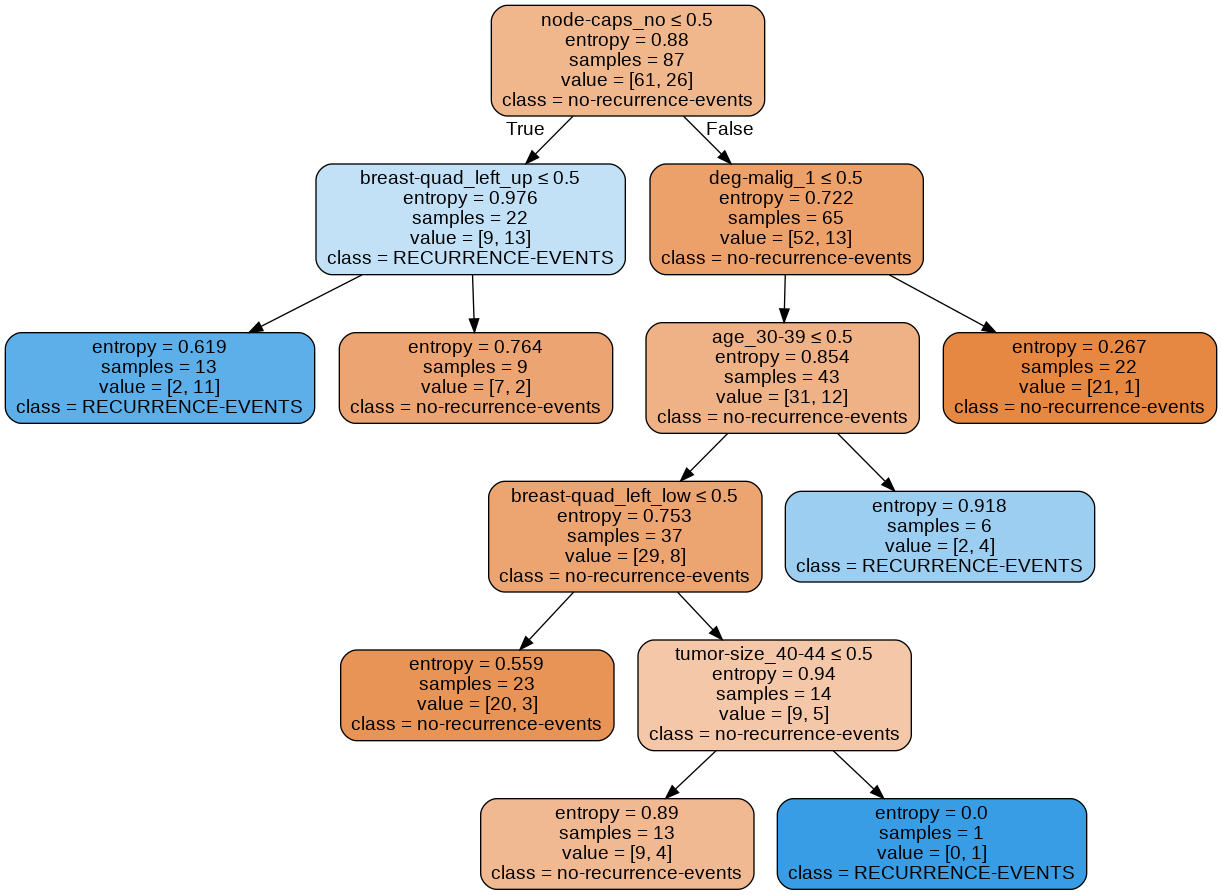

In [79]:
print_tree(dt)
Image("dt.png")